<a href="https://colab.research.google.com/github/fsafarkhani/Intro-to-AI-and-Machine-Learning/blob/main/upervised-learning.decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

#import libraries

In [ ]:


import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score


#read data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")

df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#dtype

In [ ]:
print(df.dtypes)

id          int64
class       int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 786, dtype: object



# Split the entire DataFrame df into df_train and df_test

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)

#original dataframe
print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

x_train = df_train.drop("class", axis=1)
y_train = df_train["class"]
x_test = df_test.drop("class", axis=1)
y_test = df_test["class"]


print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)


df size: (4000, 786)
df_train size: (3200, 786)
df_test size: (800, 786)
df_train size: (3200, 785)
df_test size: (800, 785)
x_train size: (3200, 784)
y_train size: (3200,)
x_test size: (800, 784)
y_test size: (800,)


#Train a Decision Tree classifier


In [ ]:
dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    random_state=42
)

dt_clf.fit(x_train, y_train)




DecisionTreeClassifier(max_depth=20, random_state=42)

#Visualization

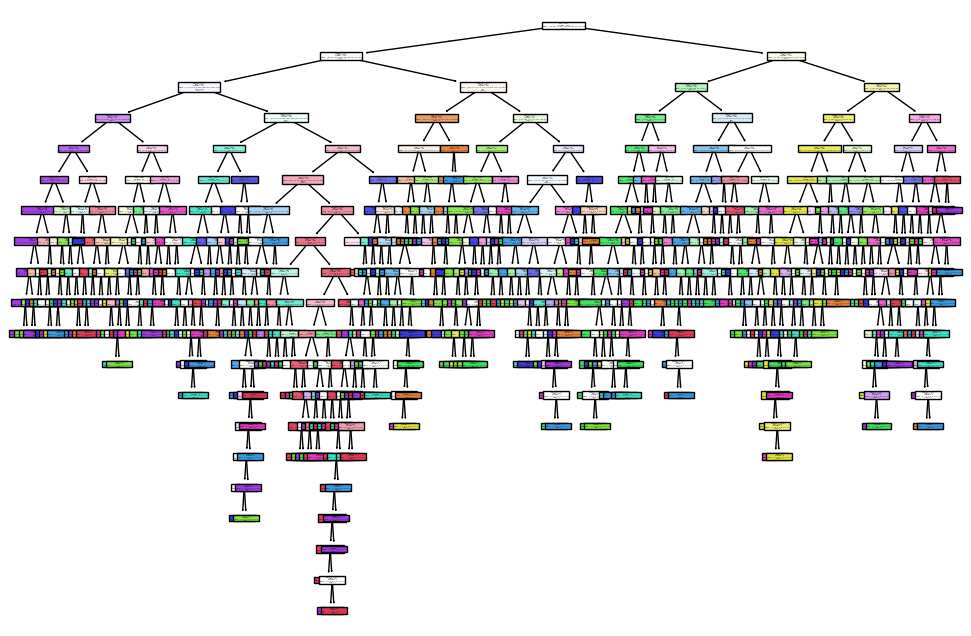

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt_clf, filled=True, feature_names=x_train.columns, class_names=[str(i) for i in range(10)])
plt.show()


#evaluation

In [ ]:
y_predicted = dt_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_predicted))


Accuracy: 0.7625

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        68
           1       0.90      0.86      0.88       104
           2       0.84      0.65      0.73        78
           3       0.73      0.69      0.71        90
           4       0.70      0.77      0.73        62
           5       0.68      0.73      0.70        78
           6       0.77      0.72      0.74        82
           7       0.74      0.88      0.80        80
           8       0.68      0.67      0.67        84
           9       0.76      0.76      0.76        74

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.77      0.76      0.76       800

